In [175]:
import numpy as np
import matplotlib.pyplot as plt
import os,sys,time
from glob import glob
from scipy.optimize import fmin
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy import interpolate
import sympy as sp
from scipy.fftpack import fft,ifft
import seaborn

In [176]:
%run Binary_function.ipynb

/Users/laote/sdsu/Research/binary/curve_bin/3w_binary/tic00260128333_SEC001_LC.txt


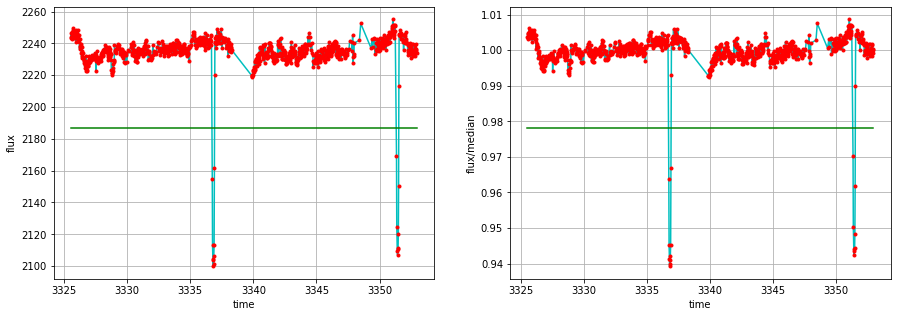

/Users/laote/sdsu/Research/binary/curve_bin/3w_binary/tic00260128333_SEC002_LC.txt


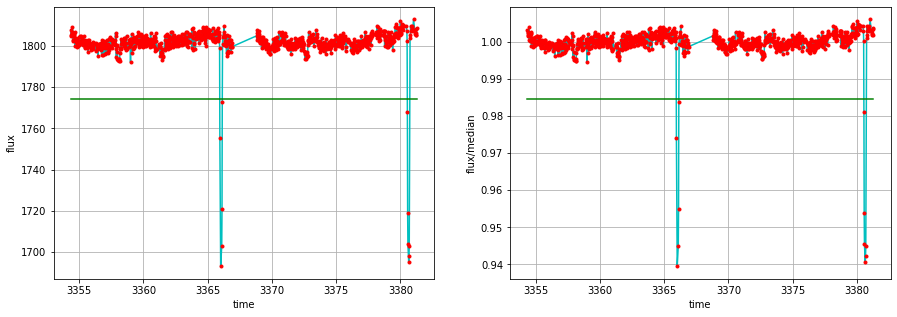

/Users/laote/sdsu/Research/binary/curve_bin/3w_binary/tic00260128333_SEC003_LC.txt


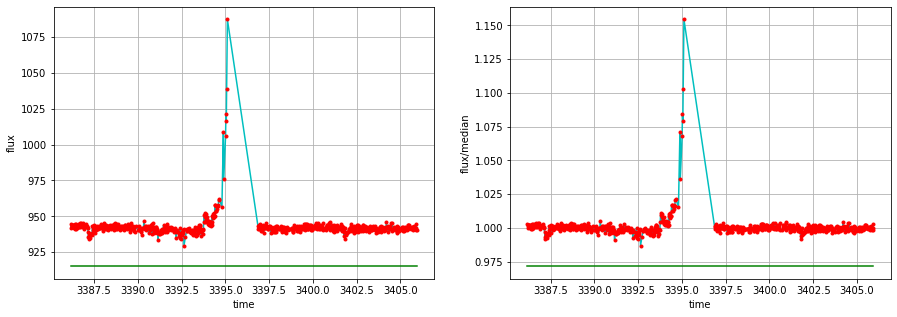

/Users/laote/sdsu/Research/binary/curve_bin/3w_binary/tic00260128333_SEC004_LC.txt


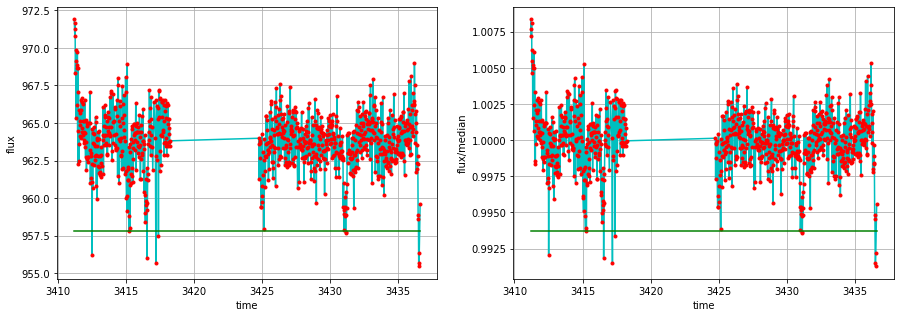

/Users/laote/sdsu/Research/binary/curve_bin/3w_binary/tic00260128333_SEC005_LC.txt


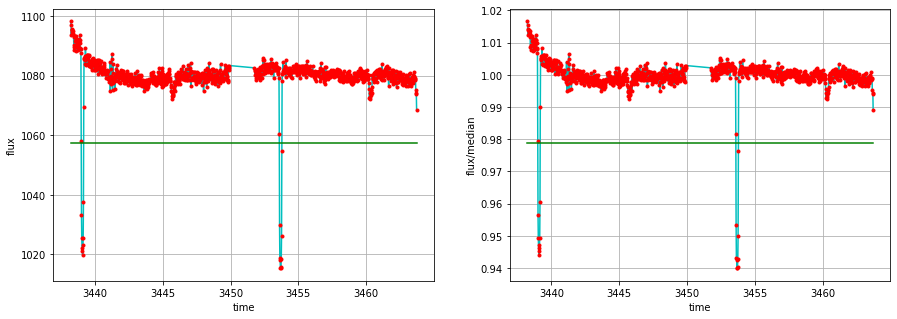

/Users/laote/sdsu/Research/binary/curve_bin/1600K_Curve_binary/tic00260128333_SEC005_LC.txt


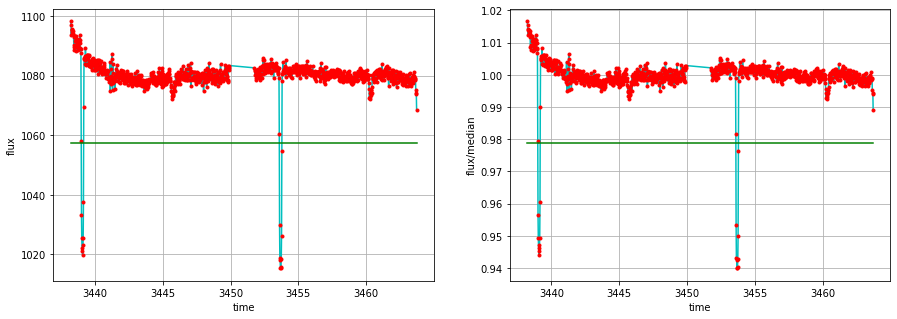

/Users/laote/sdsu/Research/binary/curve_bin/3w_binary/tic00260128333_SEC006_LC.txt


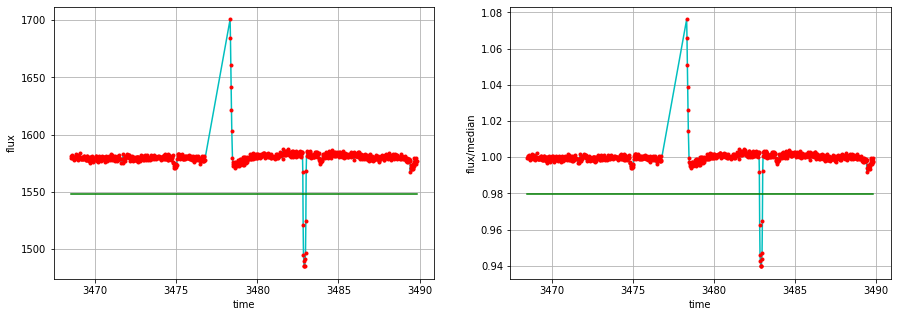

/Users/laote/sdsu/Research/binary/curve_bin/3w_binary/tic00260128333_SEC007_LC.txt


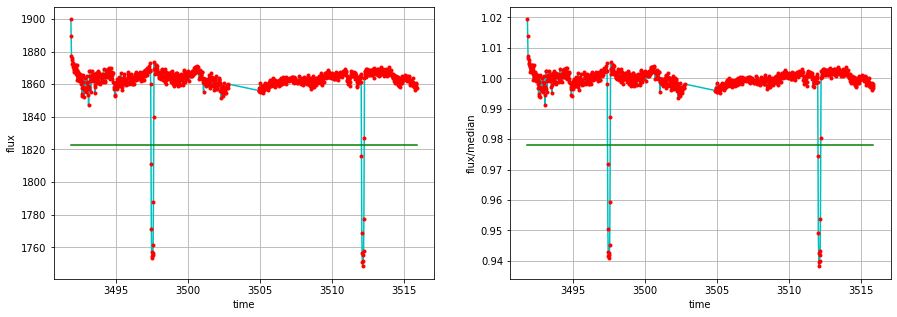

/Users/laote/sdsu/Research/binary/curve_bin/1600K_Curve_binary/tic00260128333_SEC007_LC.txt


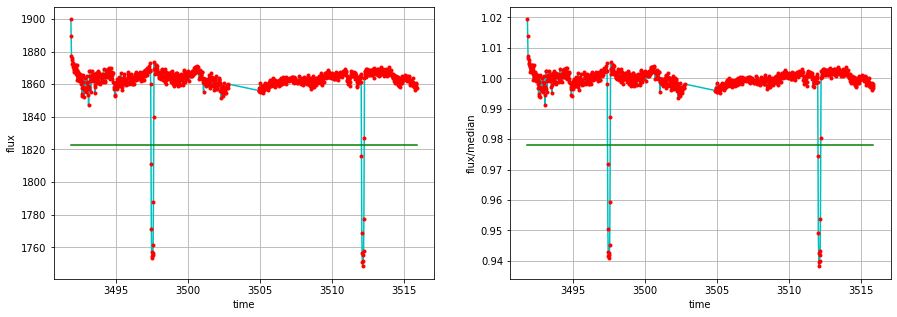

/Users/laote/sdsu/Research/binary/curve_bin/3w_binary/tic00260128333_SEC008_LC.txt


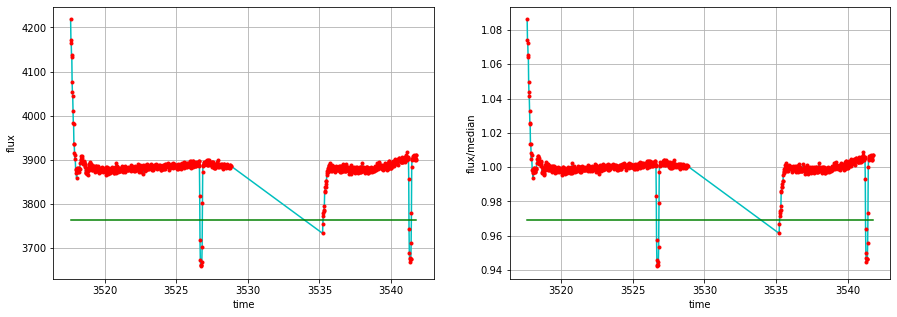

/Users/laote/sdsu/Research/binary/curve_bin/3w_binary/tic00260128333_SEC009_LC.txt


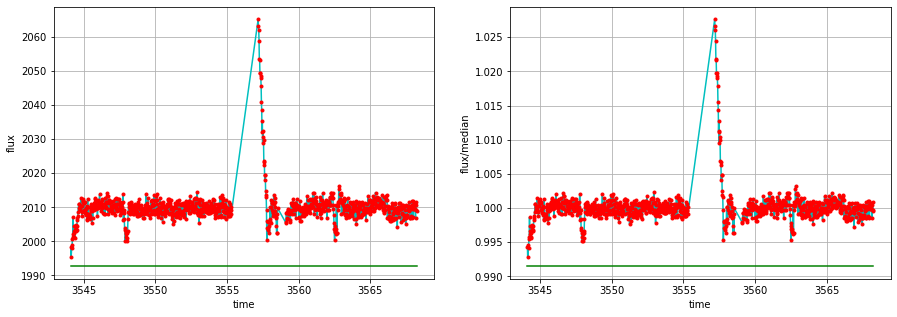

/Users/laote/sdsu/Research/binary/curve_bin/1600K_Curve_binary/tic00260128333_SEC009_LC.txt


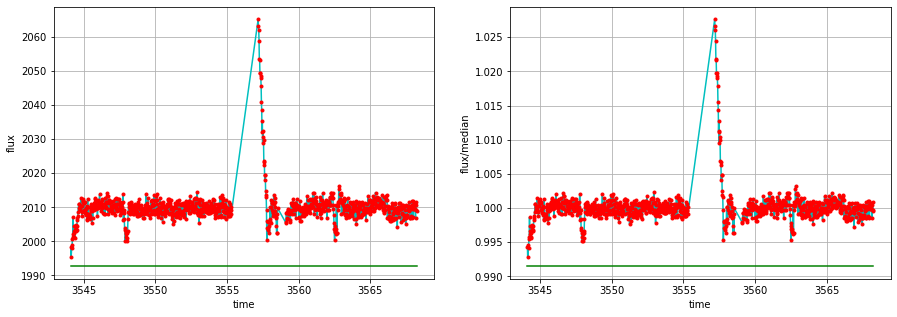

/Users/laote/sdsu/Research/binary/curve_bin/3w_binary/tic00260128333_SEC010_LC.txt


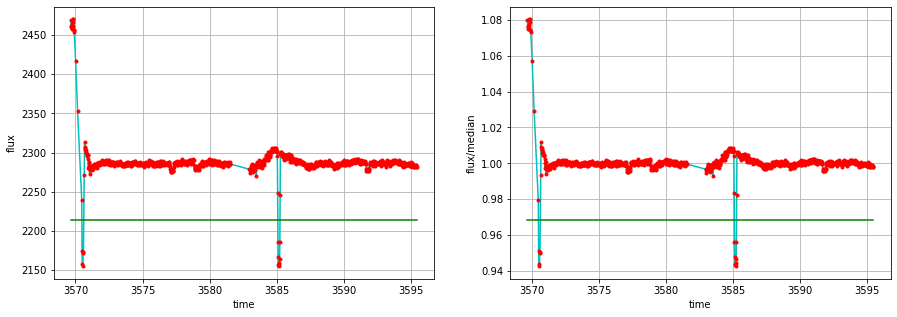

/Users/laote/sdsu/Research/binary/curve_bin/1600K_Curve_binary/tic00260128333_SEC010_LC.txt


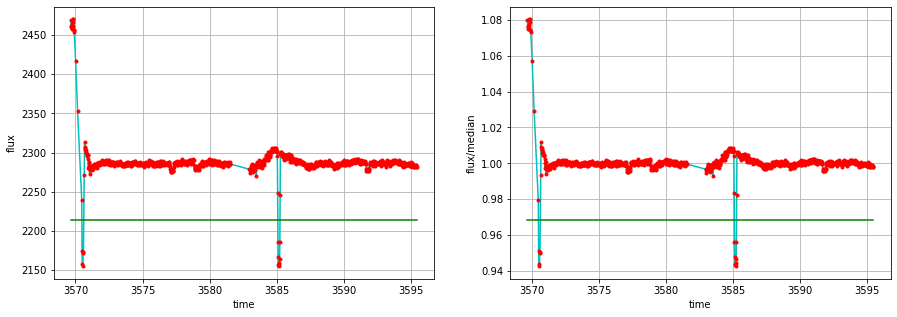

/Users/laote/sdsu/Research/binary/curve_bin/3w_binary/tic00260128333_SEC011_LC.txt


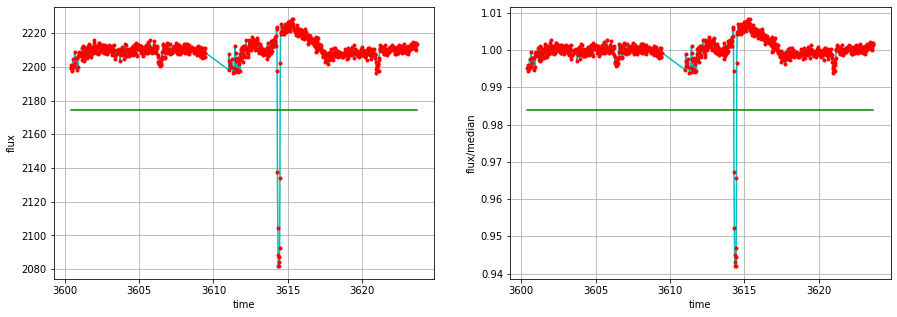

/Users/laote/sdsu/Research/binary/curve_bin/3w_binary/tic00260128333_SEC012_LC.txt


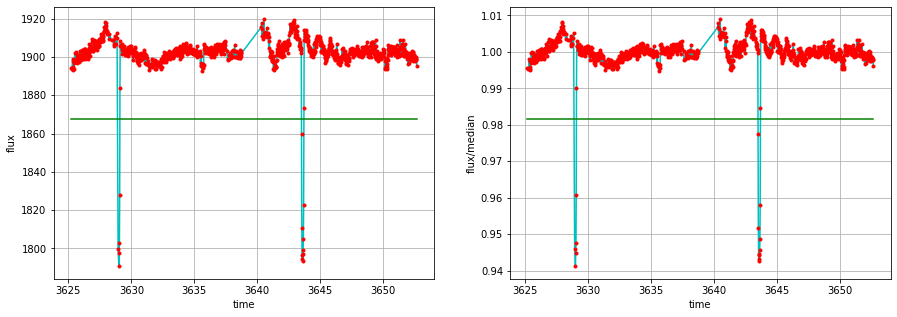

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:67: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


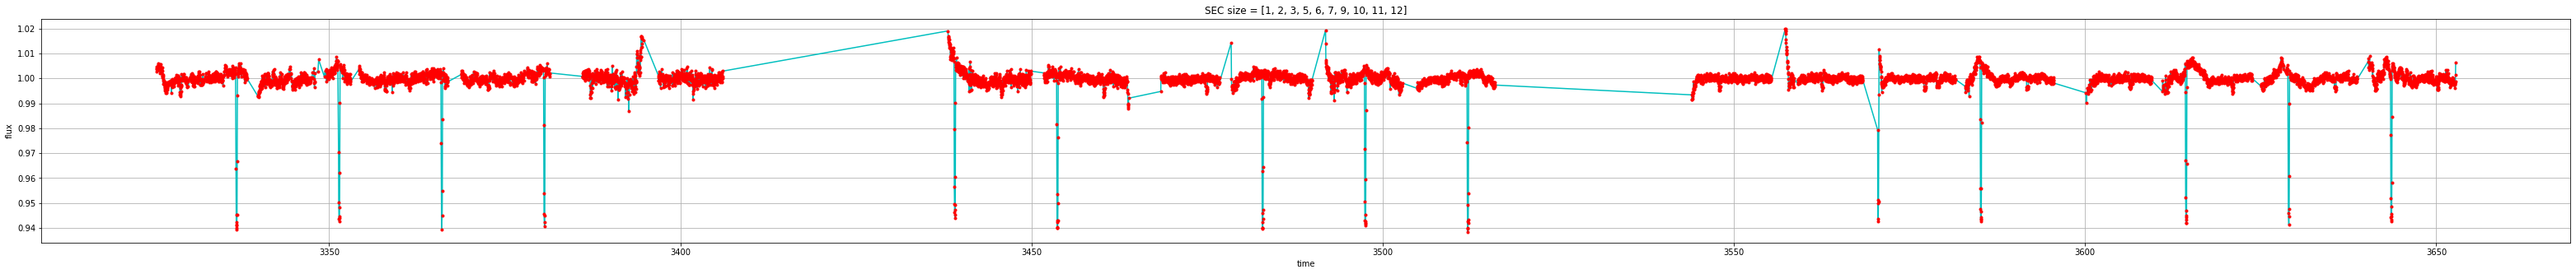

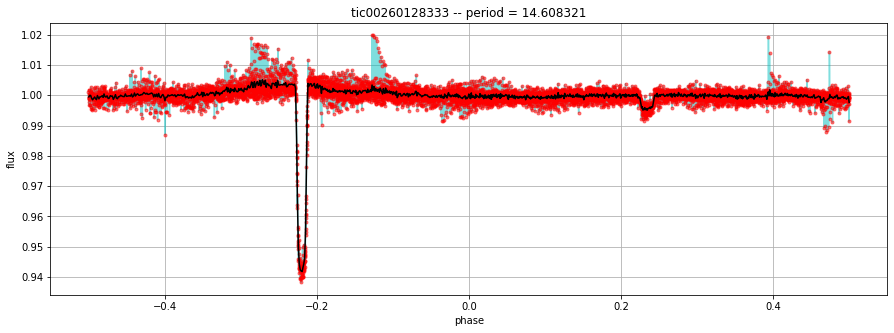

(-1.5521789759673408,
 array([-0.49998093, -0.49995522, -0.49990794, ...,  0.49947309,
         0.49974861,  0.49980175]),
 array([1.00112969, 0.99944578, 0.99923082, ..., 0.99132578, 0.99852245,
        1.00045075]))

In [167]:
basedir = '/Users/laote/sdsu/Research/binary/curve_bin/'
base3wdir = basedir + '3w_binary/'
base16dir = basedir + '1600K_Curve_binary/'


# tic00393347190
gp = 14.60832108
tic00393347190 =  glob("/Users/laote/sdsu/Research/binary/curve_bin/*/tic00260128333*_LC.txt")
tic00393347190 = sorted(tic00393347190, key=lambda name: int(name[-25:-14] + name[-10:-7]))
for tic in tic00393347190:
    print(tic)
    check_lc(tic,error=True)
# t425, f425, et425 = mulit_light_curve(tic,look=True)
# sing_dc_func(tic,gp,True)

In [173]:
print(find_eclipse(tic,gp,3336))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:67: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


[3336.8348426710554, 3351.4442712536825, 3366.4951851668975, 3441.1104458850946, 3482.880794953316, 3497.5058338089184, 3512.115133824144, 3571.286564116923, 3583.2968578608425, 3611.674584905969, 3629.017466495374, 3643.604797380209]


In [177]:
prim_eci = np.array([3336.8348426710554, 3351.4442712536825, 3366.4951851668975, 
                    3441.1104458850946, 3482.880794953316, 3497.5058338089184,
                    3512.115133824144, 3571.286564116923, 3583.2968578608425, 
                    3629.017466495374, 3643.604797380209])
sec_eci = np.array([3524.2536961549285, 3539.730117008746, 3547.474005289991,
                    3555.2152053065115, 3562.9550717224906])
third_eci = np.array([3565.019977551961])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:67: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


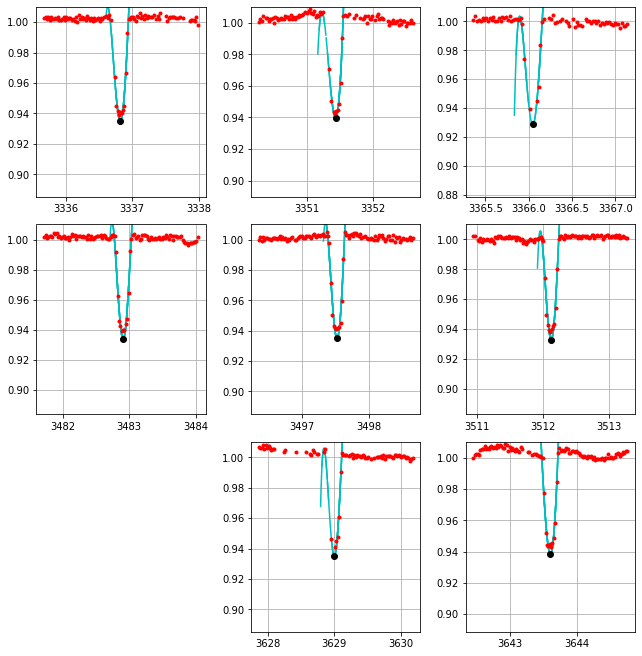

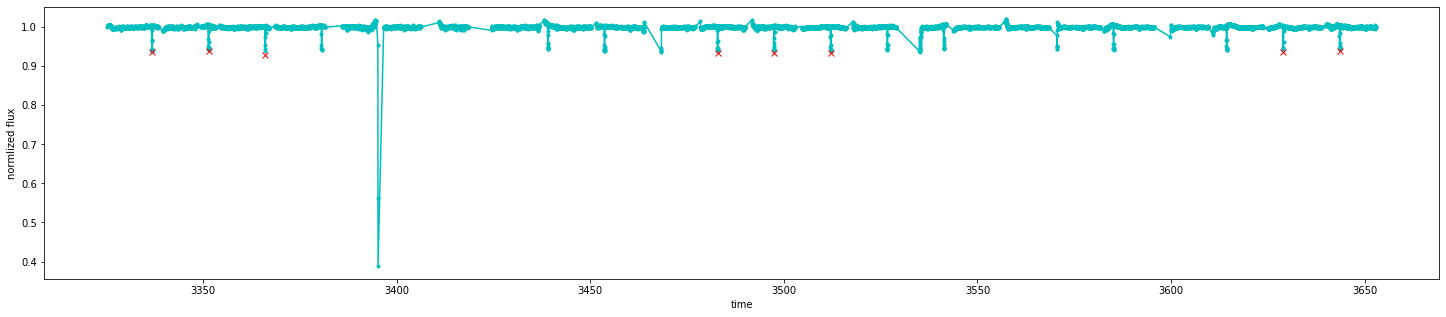

In [178]:
prim_time = find_eclipse_single(tic,gp,prim_eci,True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:67: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


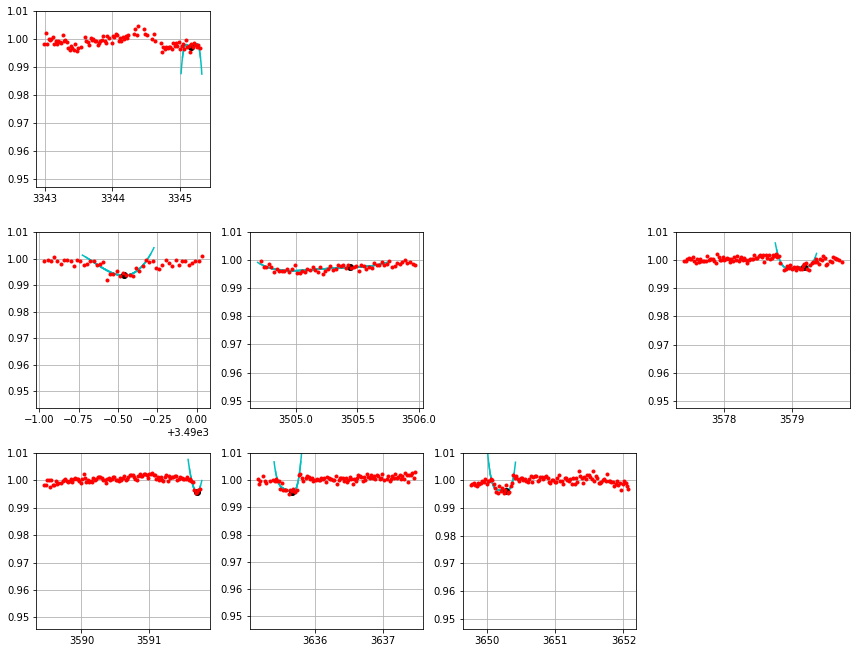

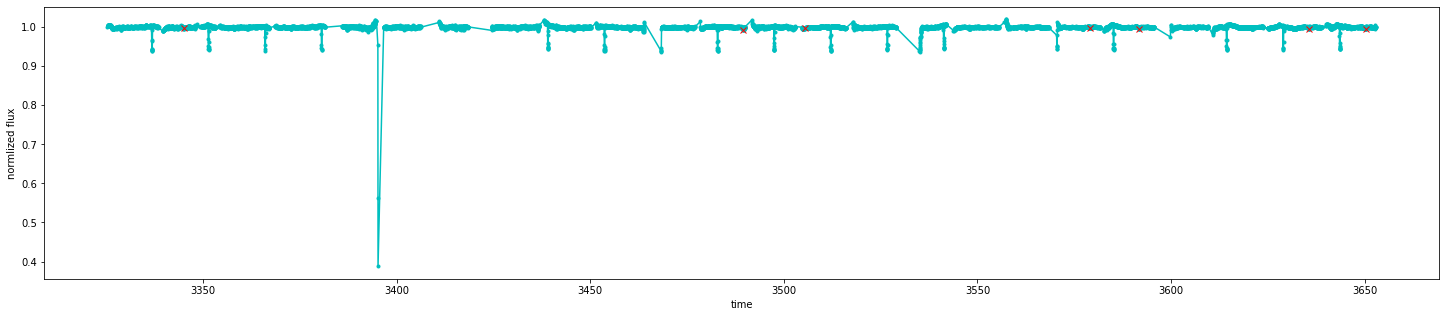

In [179]:
sec_time = find_eclipse_single(tic,gp,prim_eci+gp/2,True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


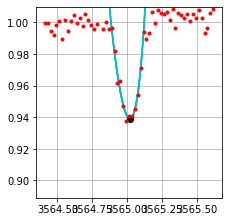

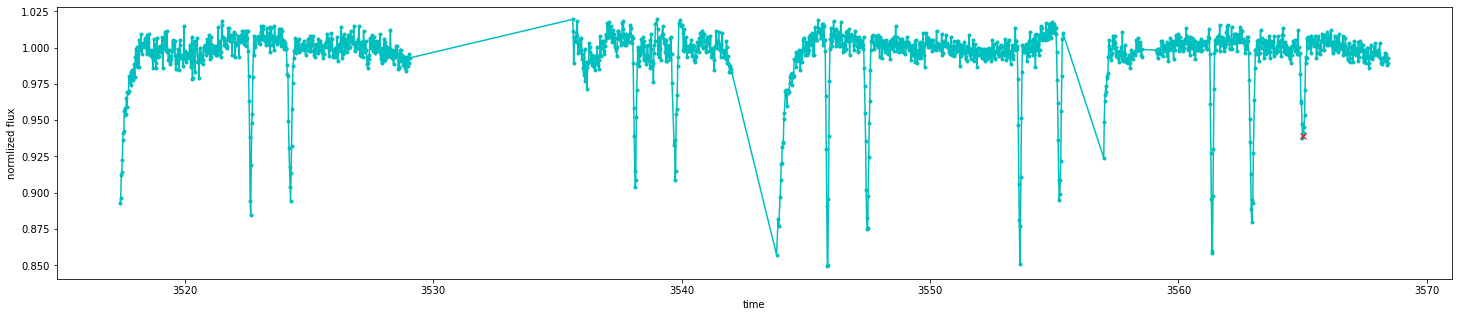

In [118]:
third_time = find_eclipse_single(tic,gp,third_eci,True)

In [181]:
print(prim_time)
print(sec_time)
print(third_time)

[3336.82306021 3351.4362627  3366.04706268 3482.90884885 3497.52151328
 3512.12826344 3628.99987017 3643.60443665]
[3345.17355376 3489.53563113 3505.44066812 3579.17213198 3591.71434071
 3635.66541119 3650.28133763]
[3565.019977541026]


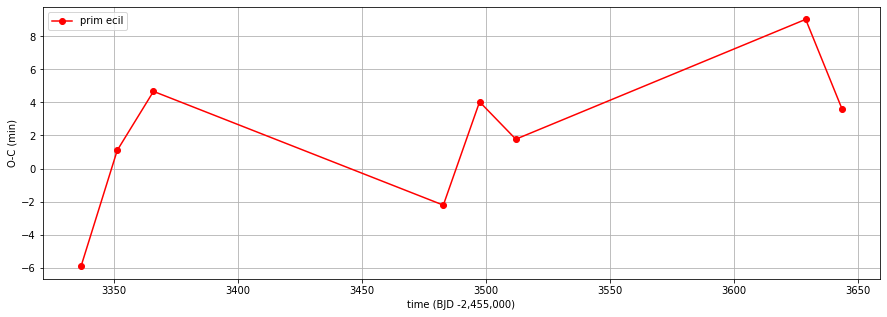

In [187]:
pp,fe = 14.60832108, 3526.73535075
sp,se = 14.54084222, 3519.57625859

prim_time = np.array(prim_time);sec_time = np.array(sec_time)
phip, Ip = Phase_cycle(prim_time,pp, fe)
phis, Is = Phase_cycle(sec_time,sp, se)

OC_p = prim_time - fe - Ip*pp
OC_s = sec_time - se - Is*sp


plt.figure(figsize=(15,5))
plt.plot(prim_time,OC_p*1440,'ro-',label='prim ecil')
# plt.plot(sec_time,OC_s*1440,'co--',label='sec ecil')
plt.xlabel('time (BJD -2,455,000)');plt.ylabel('O-C (min)')
plt.legend()
plt.grid()
plt.show()

In [185]:
popt, pcov = curve_fit(first_poly, Ip, prim_time)
print(popt,np.sqrt(pcov[0,0]),np.sqrt(pcov[1,1]))
popt, pcov = curve_fit(first_poly, Is, sec_time)
print(popt,np.sqrt(pcov[0,0]),np.sqrt(pcov[1,1]))
time_comb = np.append(prim_time,sec_time)
phic, Ic = Phase_cycle(time_comb,pp/2, fe)
popt, pcov = curve_fit(first_poly, Ic, time_comb)
print(popt,np.sqrt(pcov[0,0]),np.sqrt(pcov[1,1]))

[  14.60855136 3526.73752559] 0.00012625119186597327 0.0010572359544883964
[  14.54084222 3519.57625859] 0.04725186000797244 0.3268829660292609
[   7.29214168 3526.72306119] 0.01002440855328647 0.15415007069089157


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:67: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


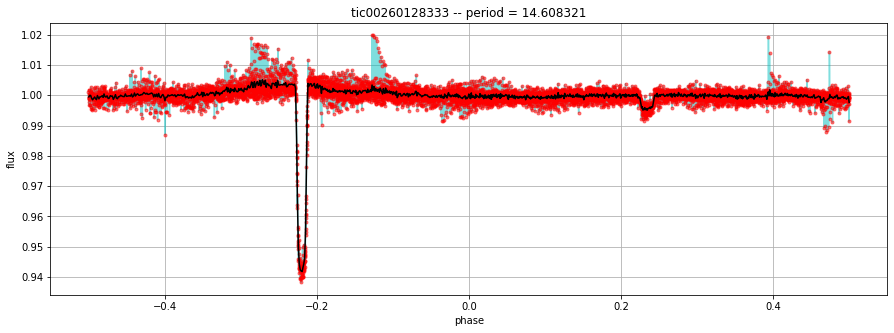

(-1.5521789759673408,
 array([-0.49998093, -0.49995522, -0.49990794, ...,  0.49947309,
         0.49974861,  0.49980175]),
 array([1.00112969, 0.99944578, 0.99923082, ..., 0.99132578, 0.99852245,
        1.00045075]))

In [188]:
sing_dc_func(tic,pp,look=True)